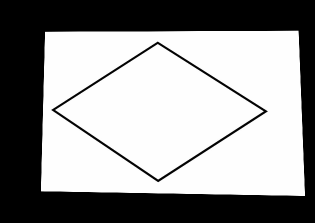

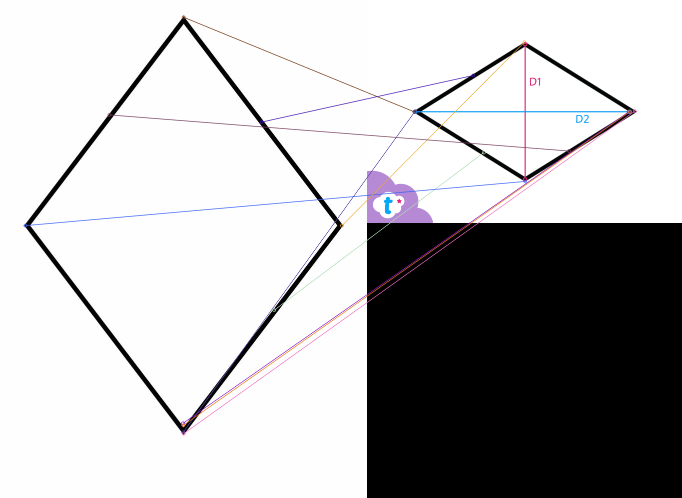

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load images
img1 = cv2.imread('/content/img-01.jpg')
img2 = cv2.imread('/content/img-02.png')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Use BFMatcher to find matches between descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find the homography matrix using RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

# Use the homography matrix to warp img1 to match img2
height, width, _ = img2.shape
img1_aligned = cv2.warpPerspective(img1, H, (width, height))

# Resize images for smaller display (50% size)
def resize_img(img, scale=0.5):
    return cv2.resize(img, (int(img.shape[1]*scale), int(img.shape[0]*scale)))

small_aligned = resize_img(img1_aligned, 0.5)
small_matches = resize_img(img_matches, 0.5)

# Show resized output
cv2_imshow(small_aligned)
cv2_imshow(small_matches)
